An implicitely defined quadratic curve is the zero-set $\{(x,y)∈R^2:f(x,y) = 0\}$,where

$$ f(x,y) = (x,y)^TA(x,y) +b^T(x,y) +c$$

with $A∈R^{2×2}$ a symmetric matrix, $b∈R^2$, and $c∈R$ is a quadratic polynomial in $x$ and $y$.These  curves  include  ellipses,  hyperbola,  and  parabola.

Find the intersection points of two implicitely defined quadratic curves using Newton’s method.  How many points may occure,  at most,  in the various cases ?  Use the matplotlib.pyplot.contour function for plotting the curves, and choose good initial values by hand.

<img src="2D_quadriken.png">

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class quadratic_curve:
    def __init__(self, A, b, c):
        self.A = A
        self.b = b
        self.c = c
        
    def evaluate(self, xy):
        return xy.T @ self.A @ xy + self.b.T @ xy + self.c
    
    def evaluate_gradient(self, xy):
        x, y = xy
        
        dx = 2*self.A[0,0]*x + 2*self.A[0,1]*y + self.b[0]
        dy = 2*self.A[1,1]*y + 2*self.A[0,1]*x + self.b[1]
        return np.array([dx, dy])
    
    def plot(self, x_min, x_max, y_min, y_max):
        x = np.linspace(x_min, x_max, 100)
        y = np.linspace(y_min, y_max, 100)
        X, Y = np.meshgrid(x, y)
        
        Z = self.A[0,0]*X**2 + 2*self.A[0,1]*X*Y + self.A[1,1]*Y**2 + self.b[0]*X + self.b[1]*Y + self.c
        plt.contour(X, Y, Z, [0])
                
        
def intersection_curve(c1, c2, starting_point, max_iter=30, epsilon=1e-10):
    current_point = starting_point
    point_list = [starting_point]
    
    for iter_idx in range(max_iter):
        value_c1 = c1.evaluate(current_point)
        value_c2 = c2.evaluate(current_point)
        current_f = np.vstack((value_c1, value_c2))
        
        grad_c1 = c1.evaluate_gradient(current_point)
        grad_c2 = c2.evaluate_gradient(current_point)
        
        jacobi = np.vstack((grad_c1.T, grad_c2.T))
               
        updated_point = current_point - np.linalg.inv(jacobi) @ current_f
        point_list.append(updated_point)
               
        if np.linalg.norm(updated_point - current_point) < epsilon:
            return updated_point, point_list
            
        current_point = updated_point
           
    return None, point_list

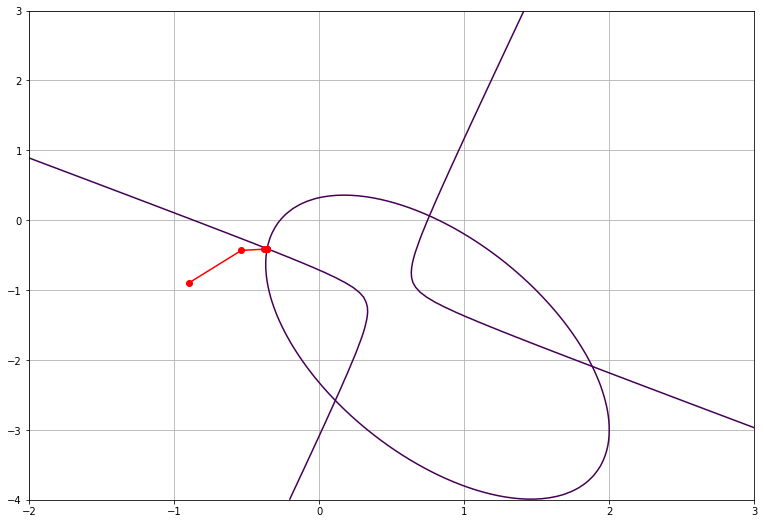

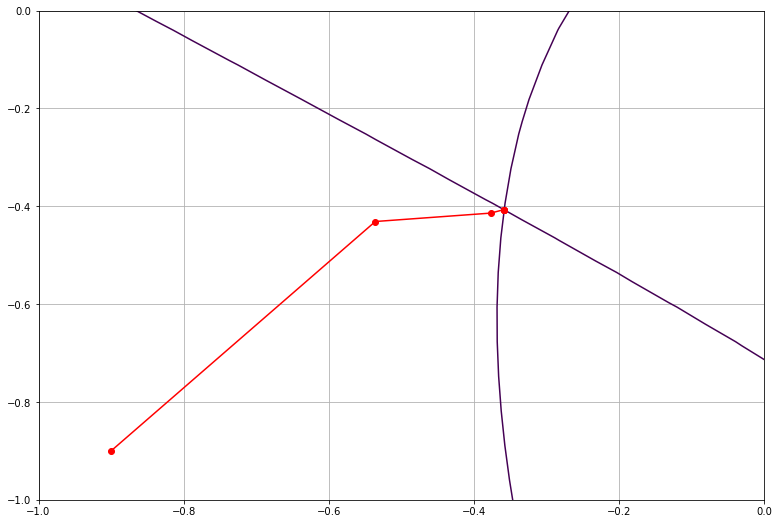

In [3]:
A = np.array([[2.7, 0.8], [0.8, 0.8]])
b = np.array([[-1.5], [1.6]])
c = -0.6

c1 = quadratic_curve(A, b, c)

A = np.array([[1.7, 0.9], [0.9, -0.5]])
b = np.array([[0.2], [-1.9]])
c = -1.1

c2 = quadratic_curve(A, b, c)

start_point = np.array([-0.9, -0.9])[np.newaxis].T
intersection_point, point_list = intersection_curve(c1, c2, start_point)

plt.figure(figsize=(13, 9))
c1.plot(-2, 3, -4, 3)
c2.plot(-2, 3, -4, 3)
point_list = np.reshape(np.concatenate(point_list), (-1, 2))
plt.plot(point_list[:, 0], point_list[:, 1], 'r-o')
plt.grid()

plt.figure(figsize=(13, 9))
c1.plot(-2, 3, -4, 3)
c2.plot(-2, 3, -4, 3)
point_list = np.reshape(np.concatenate(point_list), (-1, 2))
plt.plot(point_list[:, 0], point_list[:, 1], 'r-o')
plt.xlim([-1, 0])
plt.ylim([-1, 0])
plt.grid()
